In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import make_classification
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("Data - Parkinsons")
ParkinsonData =df.copy()

In [3]:
ParkinsonData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df[df["status"]== 1]["name"].value_counts().sum()
# 147 has PD status in dataset, while 48 donot have PD

147

# Observations:
- **I have analyzed the data set and come up with these conclusions. There are a total of 195 rows of data or patients with 23 feature columns.In this data set, 147 of the rows have Parkinson’s whereas 48 do not**

In [5]:
ParkinsonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
ParkinsonData.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
ParkinsonData.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    nanValues = df.isna().sum().sort_values(ascending=False)
    missing_data = pd.concat([total, percent, nanValues], axis=1, keys=['Total', 'Percent','Nan Values'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(ParkinsonData)

,Total,Percent,Nan Values
PPE,0,0.0,0
D2,0,0.0,0
MDVP:Fo(Hz),0,0.0,0
MDVP:Fhi(Hz),0,0.0,0
MDVP:Flo(Hz),0,0.0,0
MDVP:Jitter(%),0,0.0,0
MDVP:Jitter(Abs),0,0.0,0
MDVP:RAP,0,0.0,0
MDVP:PPQ,0,0.0,0
Jitter:DDP,0,0.0,0


# Observations:

- **there are no missing values or null values therefore no need of imputation**

In [9]:
ParkinsonData=ParkinsonData.drop(labels = "name", axis = 1)

In [10]:
ParkinsonData.shape

(195, 23)

In [11]:
print('Skewness of MDVP:Fo(Hz)     : ', ParkinsonData["MDVP:Fo(Hz)"].skew())
print('Skewness of MDVP:Fhi(Hz)    : ', ParkinsonData["MDVP:Fhi(Hz)"].skew())
print('Skewness of MDVP:Flo(Hz)    : ', ParkinsonData["MDVP:Flo(Hz)"].skew())
print('Skewness of MDVP:Jitter(%)  : ', ParkinsonData["MDVP:Jitter(%)"].skew())
print('Skewness of MDVP:Jitter(Abs): ', ParkinsonData["MDVP:Jitter(Abs)"].skew())
print('Skewness of MDVP:RAP        : ', ParkinsonData["MDVP:RAP"].skew())
print('Skewness of MDVP:PPQ        : ', ParkinsonData["MDVP:PPQ"].skew())
print('Skewness of Jitter:DDP      : ', ParkinsonData["Jitter:DDP"].skew())
print('Skewness of MDVP:Shimmer    : ', ParkinsonData["MDVP:Shimmer"].skew())
print('Skewness of MDVP:Shimmer(dB): ', ParkinsonData["MDVP:Shimmer(dB)"].skew())
print('Skewness of Shimmer:APQ3    : ', ParkinsonData["Shimmer:APQ3"].skew())
print('Skewness of Shimmer:APQ5    : ', ParkinsonData["Shimmer:APQ5"].skew())
print('Skewness of MDVP:APQ        : ', ParkinsonData["MDVP:APQ"].skew())
print('Skewness of Shimmer:DDA     : ', ParkinsonData["Shimmer:DDA"].skew())
print('Skewness of NHR             : ', ParkinsonData["NHR"].skew())
print('Skewness of HNR             : ', ParkinsonData["HNR"].skew())
print('Skewness of RPDE            : ', ParkinsonData["RPDE"].skew())
print('Skewness of DFA             : ', ParkinsonData["DFA"].skew())
print('Skewness of spread1         : ', ParkinsonData["spread1"].skew())
print('Skewness of spread2         : ', ParkinsonData["spread2"].skew())
print('Skewness of D2              : ', ParkinsonData["D2"].skew())
print('Skewness of PPE             : ', ParkinsonData["PPE"].skew())

Skewness of MDVP:Fo(Hz)     :  0.5917374636540784
Skewness of MDVP:Fhi(Hz)    :  2.542145997588398
Skewness of MDVP:Flo(Hz)    :  1.217350448627808
Skewness of MDVP:Jitter(%)  :  3.0849462014441817
Skewness of MDVP:Jitter(Abs):  2.6490714165257274
Skewness of MDVP:RAP        :  3.360708450480554
Skewness of MDVP:PPQ        :  3.073892457888517
Skewness of Jitter:DDP      :  3.3620584478857203
Skewness of MDVP:Shimmer    :  1.6664804101559663
Skewness of MDVP:Shimmer(dB):  1.999388639086127
Skewness of Shimmer:APQ3    :  1.5805763798815677
Skewness of Shimmer:APQ5    :  1.798697066537622
Skewness of MDVP:APQ        :  2.618046502215422
Skewness of Shimmer:DDA     :  1.5806179936782263
Skewness of NHR             :  4.22070912913906
Skewness of HNR             :  -0.5143174975652068
Skewness of RPDE            :  -0.14340241379821705
Skewness of DFA             :  -0.03321366071383484
Skewness of spread1         :  0.4321389320131796
Skewness of spread2         :  0.14443048549278412
Ske

# Observations:
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

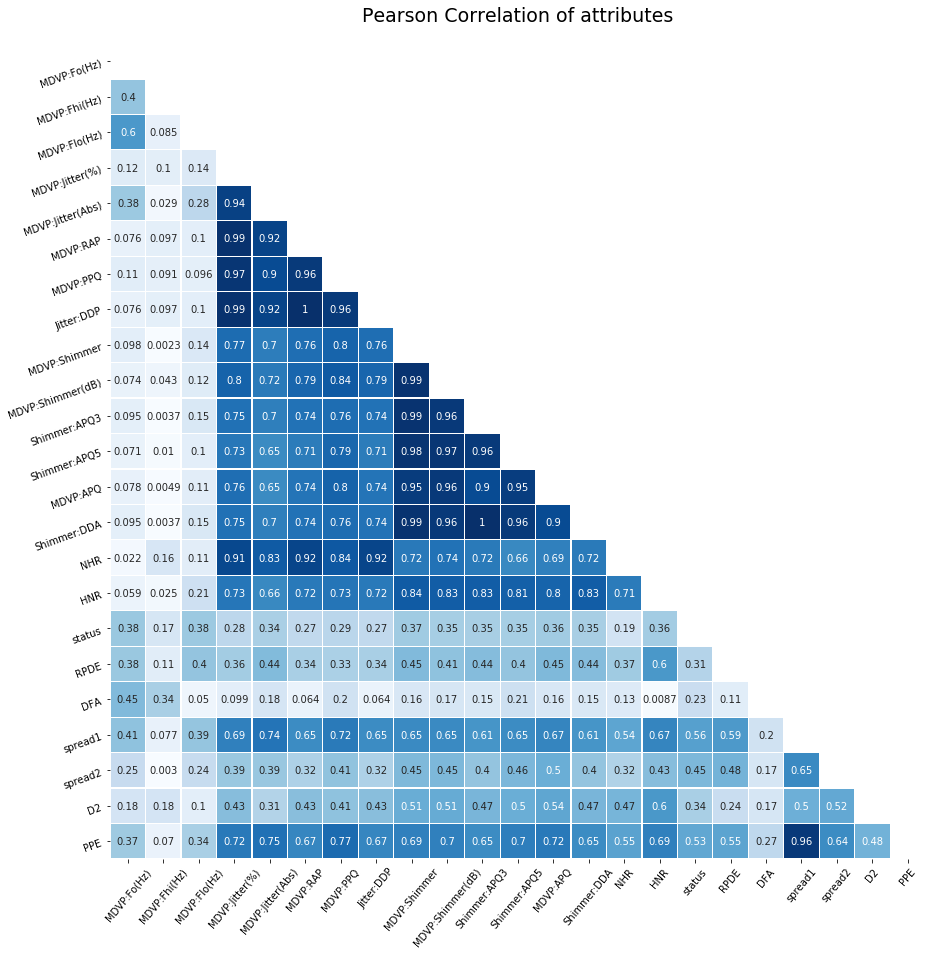

In [12]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.02, size=19)
lower_Triangle = np.tril(abs(ParkinsonData.corr()),k=-1)
mask = lower_Triangle == 0
sns.heatmap(lower_Triangle,linewidths=0.2,center=0.5,vmax=1.0,cbar= False,xticklabels = ParkinsonData.corr().index, yticklabels = ParkinsonData.corr().columns,
            square=True, cmap='Blues', linecolor='white', annot=True,mask= mask)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

# Observations:
- **MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP**
- **MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. This may be because multi-dimensinal voice programs analysis is closely related with these variables**
- **The target variable status has a weak positive corelation with spread1**

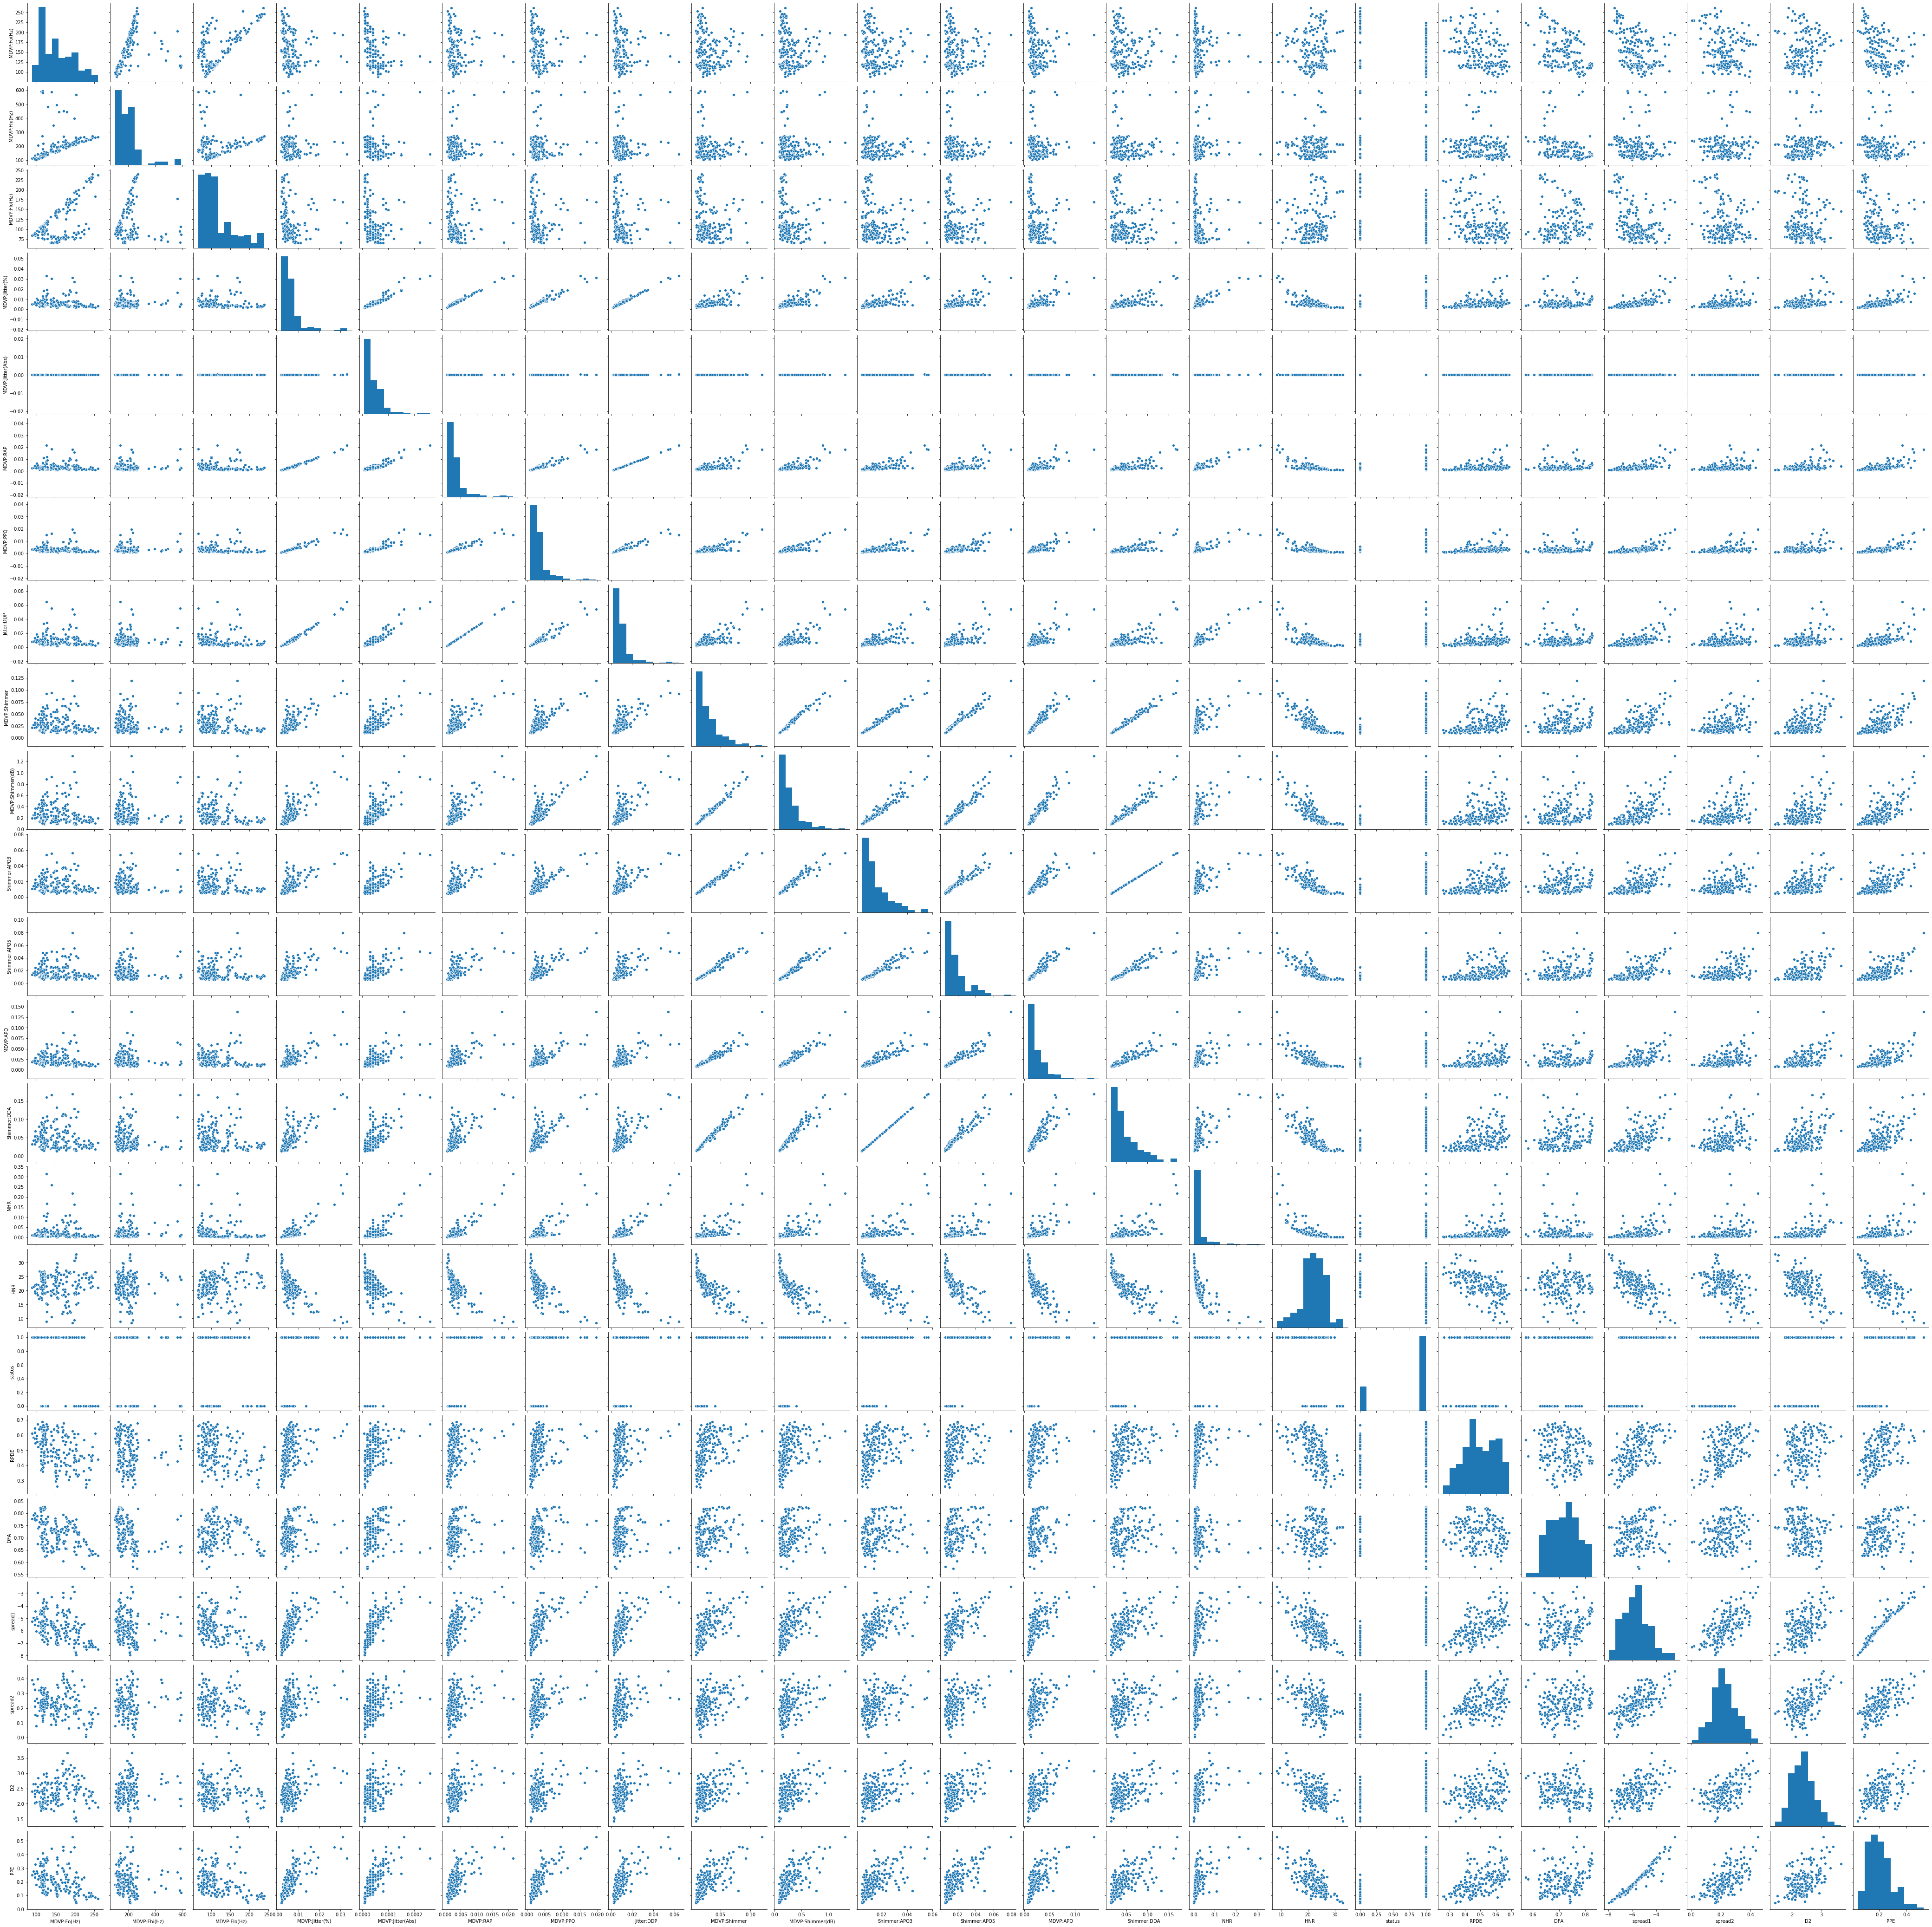

In [13]:
sns.pairplot(ParkinsonData)

# Univariate Analysis

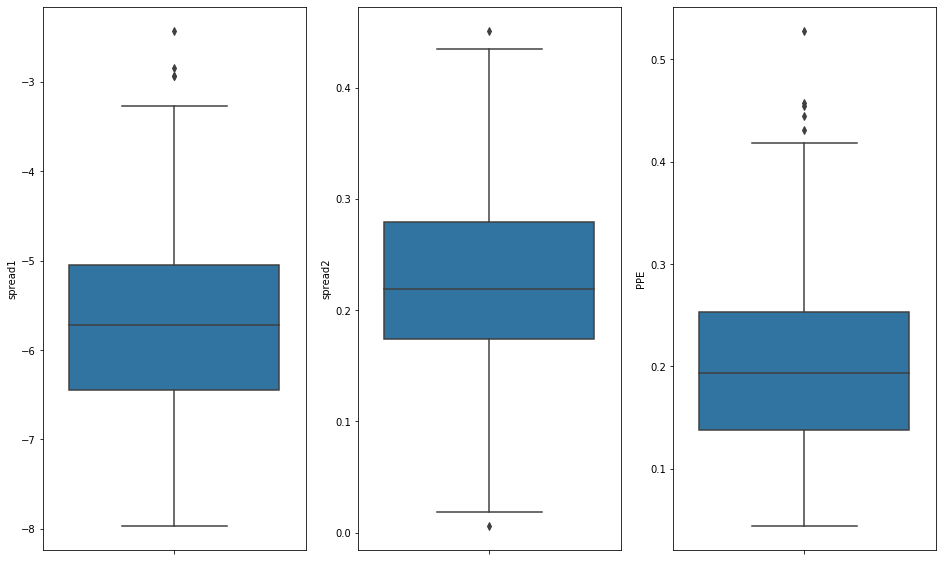

In [14]:
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=ParkinsonData, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=ParkinsonData, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=ParkinsonData,ax=ax[2],orient='v')

# observations
- **The above figure shows the box plot of the frequency variation. All the three variations have outliers.**

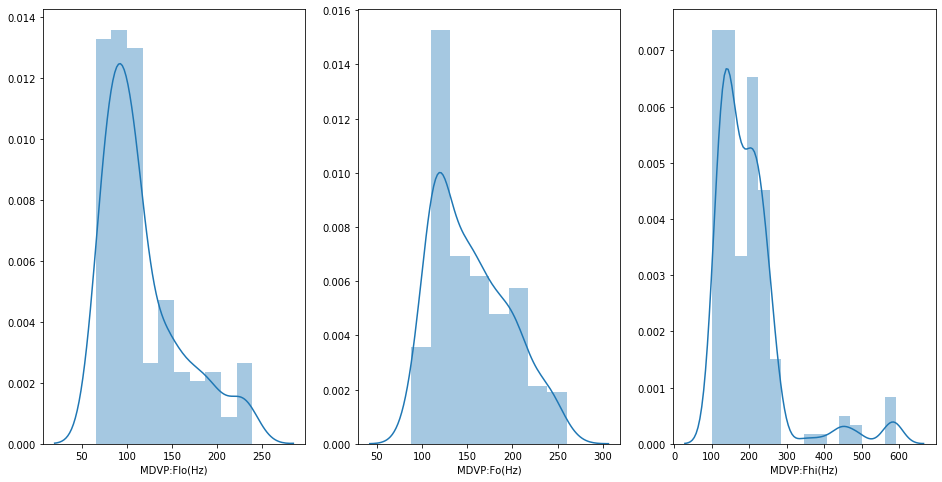

In [15]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(ParkinsonData['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(ParkinsonData['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(ParkinsonData['MDVP:Fhi(Hz)'],ax=ax[2])

# Observations:

- **The measures of vocal fundamental frequency are shown above. There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz**. 
- **The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz.**
- **The high vocal frequency does not have any skewness, but some range of values are at the right most tail**

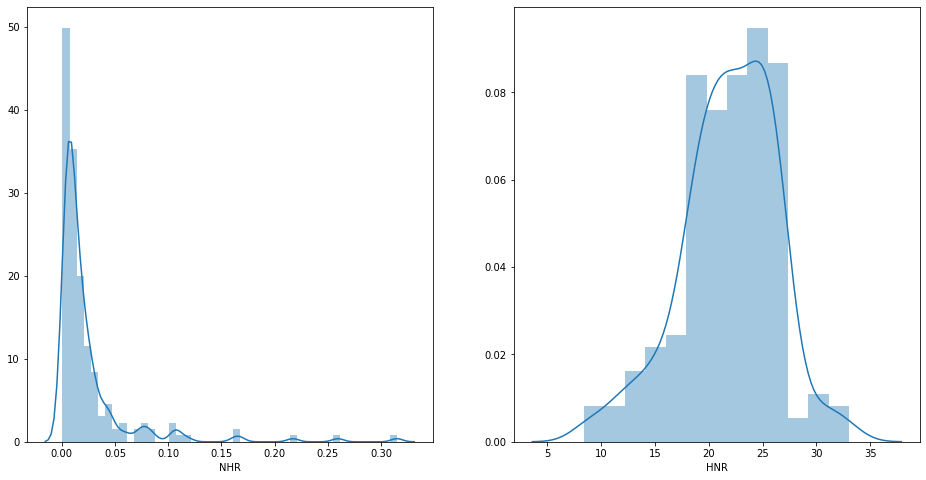

In [16]:
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(ParkinsonData['NHR'],ax=ax[0]) 
sns.distplot(ParkinsonData['HNR'],ax=ax[1])

# Observations:

- **The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. The maximum number of observations is between 0 and 0.04**
- **The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness**

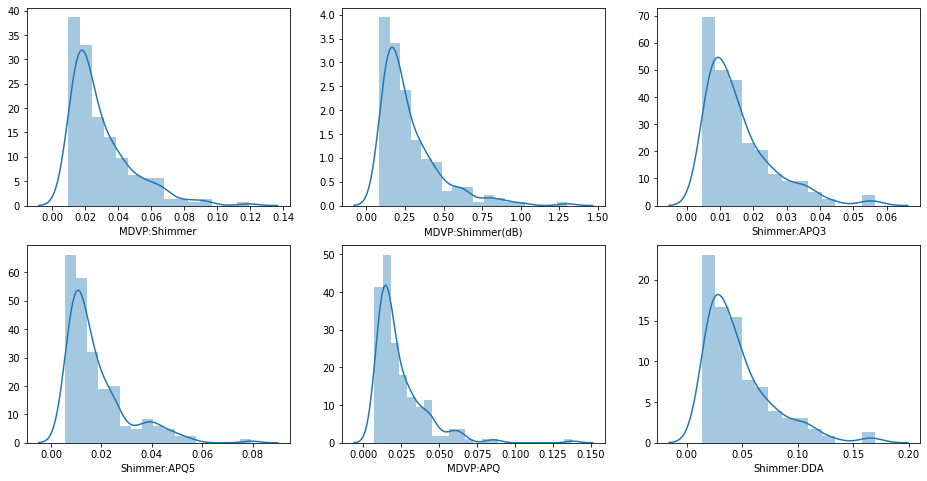

In [17]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(ParkinsonData['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(ParkinsonData['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(ParkinsonData['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(ParkinsonData['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(ParkinsonData['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(ParkinsonData['Shimmer:DDA'],ax=ax[1,2])

# Observations
- **For all of the above graphs, we can observe that the measure of variation in amplitude is positively skewed**

# Bivariate Analysis

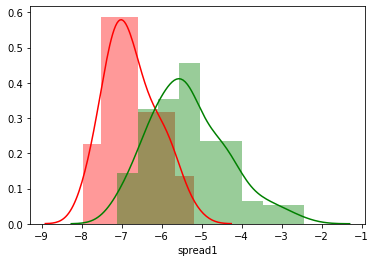

In [18]:
sns.distplot( ParkinsonData[ParkinsonData.status == 0]['spread1'], color = 'r')
sns.distplot( ParkinsonData[ParkinsonData.status == 1]['spread1'], color = 'g')

# Observations  
- **Spread1 is normally distributed between person who have PD and who is normal. People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD**

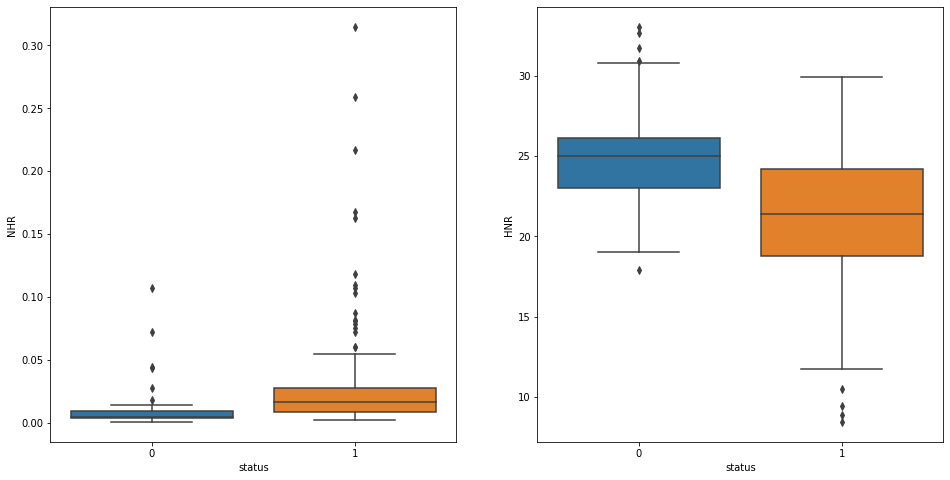

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=ParkinsonData,ax=ax[0])
sns.boxplot(x='status',y='HNR',data=ParkinsonData,ax=ax[1])

# Observations
- **People who have PD(status equal to one) have higher levels of Noise to Harmonic ratio. Also, looking into the HNR ratio people who have PD have lower levels in the same.**

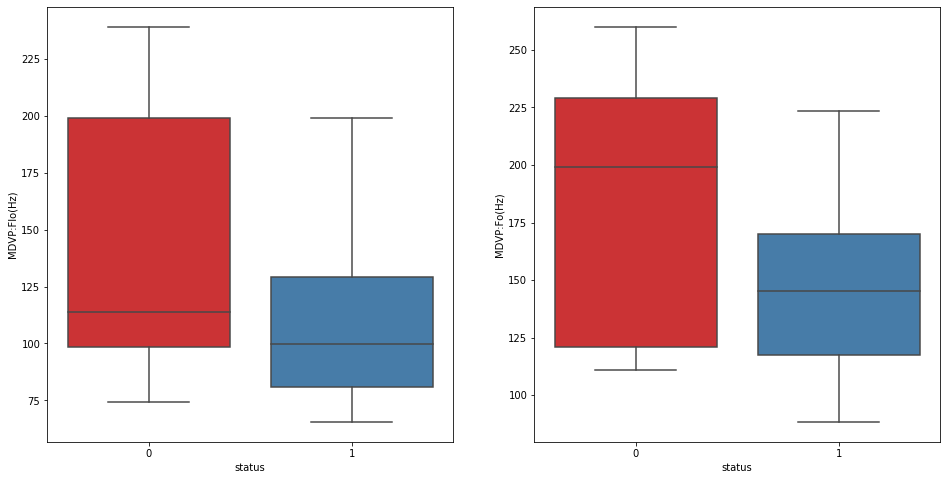

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=ParkinsonData,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=ParkinsonData,palette="Set1",ax=ax[1])

# Observation

- **In the relationship between status and MDVP:Fo(Hz), we can see the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz**

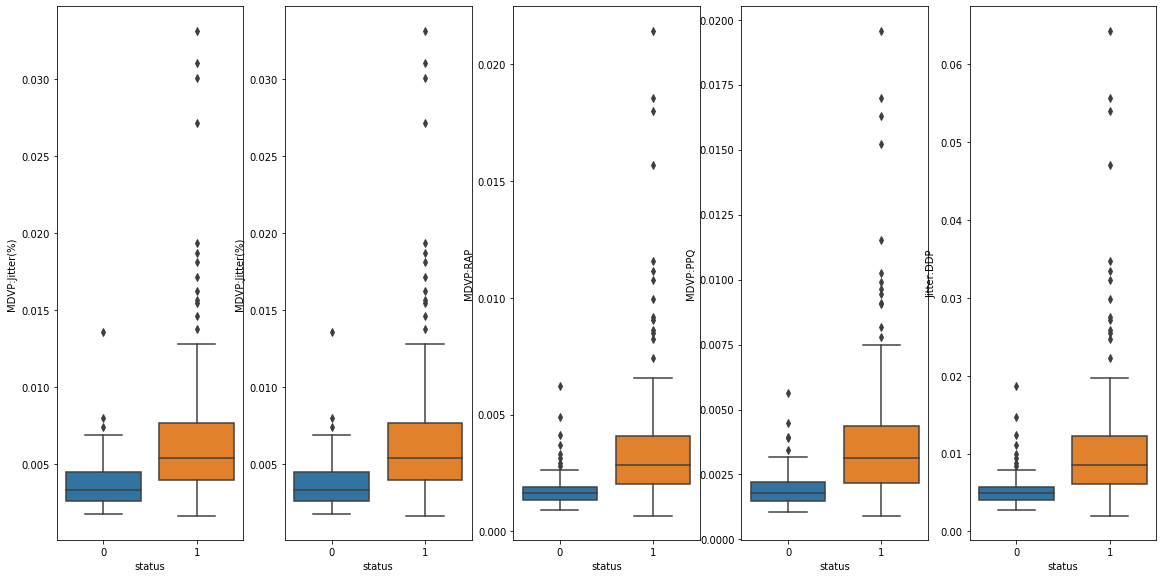

In [21]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=ParkinsonData, ax = axs[i])

# Observation
- **People who are suffering for PD tend to have higher jitter %. It seems if the values goes above 0.15 we can confirm the patient is having PD. The variation of fundamental frequency is in a low range for people who is normal.**

# Outlier detection using stats

In [22]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ParkinsonData))   # get the z-score of every value with respect to their columns
print(z)

[[0.82929965 0.43616456 0.95203729 ... 0.48047686 0.21053082 0.86888575]
 [0.77097169 0.53097409 0.05772056 ... 1.31118546 0.27507712 1.80360503]
 [0.90947638 0.7231683  0.10987483 ... 1.01768236 0.10362861 1.40266141]
 ...
 [0.49557839 0.47010361 0.96839309 ... 0.81807931 0.78033848 0.83241014]
 [1.07876114 2.19004398 0.95417967 ... 0.22906571 0.63700298 0.92610456]
 [1.45481664 0.69224632 0.88348115 ... 0.43085284 0.45480231 0.64505466]]


In [23]:
threshold = 3
np.where(z > threshold)

(array([ 73,  89,  99,  99, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 115,
        120, 146, 146, 149, 151, 151, 151, 151, 151, 151, 151, 151, 151,
        151, 151, 151, 151, 151, 152, 152, 152, 152, 152, 152, 152, 152,
        152, 157, 186, 187], dtype=int64),
 array([ 1, 21,  4, 14,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14,  1,  3,  4,
         5,  6,  7,  8,  9, 10, 13, 14,  1,  1, 11, 12,  1,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12, 13, 14, 15, 22,  3,  5,  6,  7,  8,  9, 11,
        12, 14,  4,  1,  1], dtype=int64))

In [24]:
print(z[73][1])

4.289145742337217


# Observations:

- **Z-score for row 73th with column 1 is higher than threshold and an outlier**
- **73th record on column MDVP:Fhi(Hz) is an outlier.**

In [29]:
ParkinsonData['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

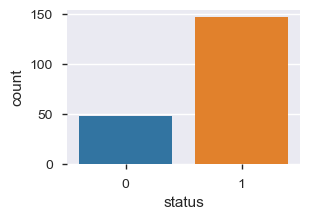

In [30]:
plt.figure(figsize=(3,2))
sns.countplot(ParkinsonData.status)

# Observation:
- **this is class imblance prob as ther eare only 48 of zero status and 147 of one status**

# Prepare data for training
- **Seperate Predictors from the target**
- **Split the data into test and train sets**
- **Standardize the continuous attributes**

In [31]:
#DataFlair - Get the features and labels
features=ParkinsonData.loc[:,ParkinsonData.columns!='status'].values[:,1:]
labels=ParkinsonData.loc[:,'status'].values

In [32]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


# Splitting dataset

In [33]:
#DataFlair - Split the dataset
X_train,X_test,y_train,y_test=train_test_split(features, labels, test_size=0.3, random_state = 1, stratify = labels)

In [65]:
from scipy import interp
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    model.fit(X_train, y_train)   # fir the model with the train data
    #y_proba = model.fit(X_train, y_train).predict_proba(X_test)
    y_pred = model.predict(X_test)  # make predictions on the test set
    #y_proba = model.predict_proba(X_test)
    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()  # compute the confusion matrix from the predictions and actuals
    #print(tn, fp, fn, tp)
    accscore=metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)    
    f1 = metrics.f1_score(y_test, y_pred)#folds=10, metric='accuracy'
    Cross_Valcore = mean(list(reversed(sorted(cross_val_score(model, X_test, y_test, scoring='accuracy', cv=10, n_jobs=-1)))))
    
    return  accscore,recall,precision , f1,Cross_Valcore#, roc_auc  #, pr_auc
    

# Smote with out scaling

In [64]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)  
xtrain_sm, ytrain_sm = sm.fit_sample(X_train, y_train) 

# Smote with Supervised Learning

In [67]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision, lr_f1_score,lr_Cross_Val_Score = fit_n_print(lr, xtrain_sm, X_test, ytrain_sm, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_f1_score,knn_Cross_Val_Score = fit_n_print(knn, xtrain_sm, X_test, ytrain_sm, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_f1_score,nb_Cross_Val_Score = fit_n_print(nb, xtrain_sm, X_test, ytrain_sm, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_f1_score,svm_Cross_Val_Score = fit_n_print(svm, xtrain_sm, X_test, ytrain_sm, y_test )

In [68]:
    result_SL_smote = pd.DataFrame({'AcModel' : ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],                          
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score],                          
                          'Cross Val Score' : [lr_Cross_Val_Score, knn_Cross_Val_Score, nb_Cross_Val_Score, svm_Cross_Val_Score]})
    result_SL_smote

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val Score
0,Logistic Regression,0.745763,0.681818,0.967742,0.800000,0.833333
1,KNN,0.847458,0.840909,0.948718,0.891566,0.763333
2,Naive Bayes,0.677966,0.613636,0.931034,0.739726,0.713333
3,SVM,0.830508,0.863636,0.904762,0.883721,0.760000


# Ensemble with smote

In [69]:
#bagging with multiple Base estimater

lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()
base_methods=[lr, bnb, gnb]
for bm  in base_methods:
 #print("Method: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
bag_model_accuracy, bag_model_recall, bag_model_precision, bag_model_f1_score,bag_Cross_Val_Score = fit_n_print(bag_model, xtrain_sm, X_test, ytrain_sm, y_test)

#Decision Tree

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_accuracy, dTree_recall, dTree_precision, dTree_f1_score,dTree_Cross_Val_Score = fit_n_print(dTree, xtrain_sm, X_test, ytrain_sm, y_test)

#Random Forest classifier

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision,  rfcl_f1_score,rfcl_Cross_Val_Score = fit_n_print(rfcl, xtrain_sm, X_test, ytrain_sm, y_test)

#Bagging with SVM
svm = SVC(gamma = 'auto', kernel= 'linear', degree=2)
svmcl=BaggingClassifier(base_estimator=svm, n_estimators=100, bootstrap=True)
svmcl_accuracy, svmcl_recall, svmcl_precision, svmcl_f1_score,svmcl_Cross_Val_Score = fit_n_print(svmcl, xtrain_sm, X_test, ytrain_sm, y_test)

#Bagging with K-NN
knn = KNeighborsClassifier()
knncl=BaggingClassifier(base_estimator=knn, n_estimators=100, bootstrap=True)
knncl_accuracy, knncl_recall, knncl_precision, knncl_f1_score,knncl_Cross_Val_Score = fit_n_print(knncl, xtrain_sm, X_test, ytrain_sm, y_test)


#Decision tree with entropy
dtc = DecisionTreeClassifier(criterion="entropy")
#bgcl=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_f1_score,bgcl_Cross_Val_Score = fit_n_print(dtc, xtrain_sm, X_test, ytrain_sm, y_test)

#XG boost classifier
xgbcl=XGBClassifier(learning_rate=0.001)
xgbcl_accuracy, xgbcl_recall, xgbcl_precision, xgbcl_f1_score, xgbcl_Cross_Val_Score = fit_n_print(xgbcl, xtrain_sm, X_test, ytrain_sm, y_test)

#ada boost classifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl_accuracy, abcl_recall, abcl_precision, abcl_f1_score,abcl_Cross_Val_Score = fit_n_print(abcl, xtrain_sm, X_test, ytrain_sm, y_test)

#Gradient boosting classsifier

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_f1_score,gbcl_Cross_Val_Score = fit_n_print(gbcl, xtrain_sm, X_test, ytrain_sm, y_test)



In [70]:
result_EL_smote = pd.DataFrame({'AcModel' : ['Bagging Multiple base est', 'Decision Tree(Gini)', 'Random Forest', 'Decision Tree(Entropy)','XG boost','ada boost','Gradient boosting','Bagging with SVM','Bagging with K-NN'],
                          'Accuracy': [ bag_model_accuracy , dTree_accuracy ,  rfcl_accuracy ,  bgcl_accuracy, xgbcl_accuracy,abcl_accuracy,gbcl_accuracy,svmcl_accuracy,knncl_accuracy],
                          'Recall' : [bag_model_recall ,  dTree_recall ,  rfcl_recall ,  bgcl_recall, xgbcl_recall ,abcl_recall ,gbcl_recall,svmcl_recall,knncl_recall ],
                          'Precision': [bag_model_precision , dTree_precision ,  rfcl_precision ,  bgcl_precision, xgbcl_precision, abcl_precision, gbcl_precision ,svmcl_precision,knncl_precision],                          
                          'F1 Score' : [bag_model_f1_score, dTree_f1_score, rfcl_f1_score, bgcl_f1_score,xgbcl_f1_score,abcl_f1_score,gbcl_f1_score,svmcl_f1_score,knncl_f1_score],
                          'Cross Val score' : [bag_Cross_Val_Score, dTree_Cross_Val_Score, rfcl_Cross_Val_Score, bgcl_Cross_Val_Score,xgbcl_Cross_Val_Score,abcl_Cross_Val_Score,gbcl_Cross_Val_Score,svmcl_Cross_Val_Score,knncl_Cross_Val_Score]})
result_EL_smote

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val score
0,Bagging Multiple base est,0.694915,0.636364,0.933333,0.756757,0.763333
1,Decision Tree(Gini),0.881356,0.931818,0.911111,0.921348,0.850000
2,Random Forest,0.898305,0.909091,0.952381,0.930233,0.866667
3,Decision Tree(Entropy),0.830508,0.840909,0.925000,0.880952,0.833333
4,XG boost,0.762712,0.727273,0.941176,0.820513,0.850000
5,ada boost,0.864407,0.863636,0.950000,0.904762,0.833333
6,Gradient boosting,0.932203,0.931818,0.976190,0.953488,0.850000
7,Bagging with SVM,0.796610,0.750000,0.970588,0.846154,0.866667
8,Bagging with K-NN,0.830508,0.840909,0.925000,0.880952,0.796667


In [72]:
frames = [result_SL_smote, result_EL_smote]

result_smote = pd.concat(frames)

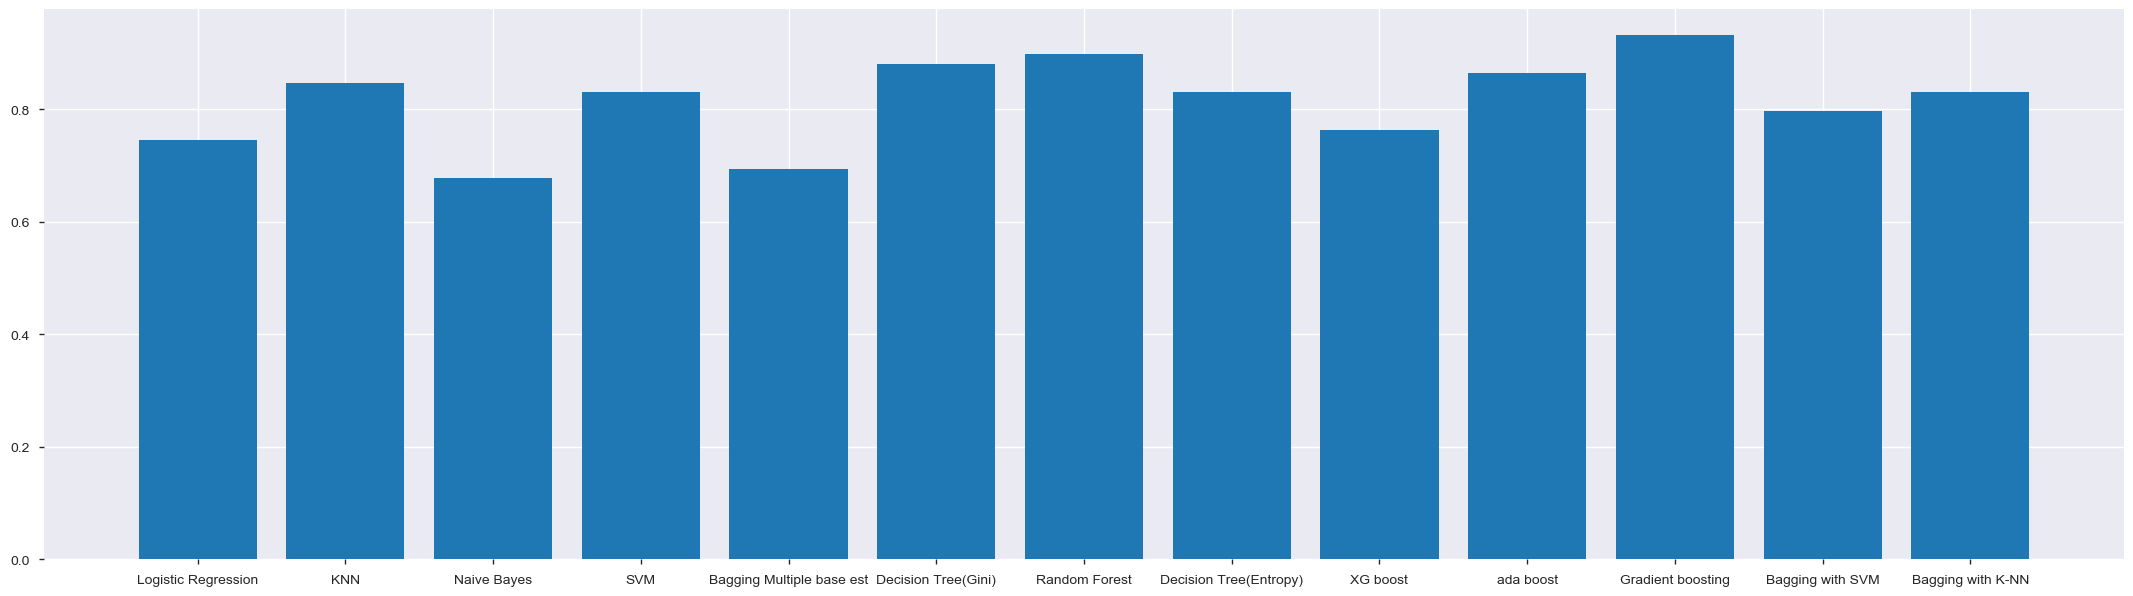

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,2.6,1])
langs = result_smote['AcModel']
students = result_smote['Accuracy']
ax.bar(langs,students)
plt.show()

# Observation

After smote, Gradient boosting is the best model from above plot

# Iteration one without scaling

In [74]:
def evaluate_models_CrossVal(scores):
    results = dict()
    for scores in list(reversed(sorted(scores))):
        # evaluate the model
        #scores = robust_evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            #results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            results ='%.3f (+/-%.3f)' % ( mean_score, std_score)     
    return results

# Supervised Models

In [75]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision, lr_f1_score,lr_Cross_Val_Score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_f1_score,knn_Cross_Val_Score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_f1_score,nb_Cross_Val_Score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_f1_score,svm_Cross_Val_Score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [76]:
    result1_SL = pd.DataFrame({'AcModel' : ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],                          
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score],                          
                          'Cross Val Score' : [lr_Cross_Val_Score, knn_Cross_Val_Score, nb_Cross_Val_Score, svm_Cross_Val_Score]})
    result1_SL

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val Score
0,Logistic Regression,0.881356,0.954545,0.893617,0.923077,0.833333
1,KNN,0.847458,0.931818,0.872340,0.901099,0.763333
2,Naive Bayes,0.694915,0.636364,0.933333,0.756757,0.713333
3,SVM,0.864407,0.954545,0.875000,0.913043,0.760000


# Observations
- **For this dataset with out scaling, Logistic Regression models give the best results on test predictions based on Accuracy ,F1score,Precision and recall values it seems to be perfect to use it.**

# Stacked meta-classifier

In [77]:
import warnings
warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()


# `random_state` to get deterministic result.
sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
    
    scores = model_selection.cross_val_score(clf, features, labels, cv=3, scoring='accuracy')   
    
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.78 (+/- 0.02) [KNN]
Accuracy: 0.79 (+/- 0.04) [Random Forest]
Accuracy: 0.69 (+/- 0.03) [Naive Bayes]
Accuracy: 0.79 (+/- 0.04) [StackingClassifier]


In [78]:
SL_accuracy, SL_recall, SL_precision, SL_f1_score,SL_Cross_Val_Score = fit_n_print(clf, X_train, X_test, y_train, y_test)
result1_SL = pd.DataFrame({'AcModel' : ['StackingClassifier'],
                           'Accuracy':[SL_accuracy],
                           'Recall':[SL_recall],
                           'Precision':[SL_precision],
                           'f1 score':[SL_f1_score],
                           'Cross Val score':[SL_Cross_Val_Score]})
result1_SL

,AcModel,Accuracy,Recall,Precision,f1 score,Cross Val score
0,StackingClassifier,0.881356,0.931818,0.911111,0.921348,0.9


# Ensemble Models

In [79]:
#bagging with multiple Base estimater

lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()
base_methods=[lr, bnb, gnb]
for bm  in base_methods:
 #print("Method: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
bag_model_accuracy, bag_model_recall, bag_model_precision, bag_model_f1_score,bag_Cross_Val_Score = fit_n_print(bag_model, X_train, X_test, y_train, y_test)

#Decision Tree

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_accuracy, dTree_recall, dTree_precision, dTree_f1_score,dTree_Cross_Val_Score = fit_n_print(dTree, X_train, X_test, y_train, y_test)

#Random Forest classifier

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision,  rfcl_f1_score,rfcl_Cross_Val_Score = fit_n_print(rfcl, X_train, X_test, y_train, y_test)

#Bagging with SVM
svm = SVC(gamma = 'auto', kernel= 'linear', degree=2)
svmcl=BaggingClassifier(base_estimator=svm, n_estimators=100, bootstrap=True)
svmcl_accuracy, svmcl_recall, svmcl_precision, svmcl_f1_score,svmcl_Cross_Val_Score = fit_n_print(svmcl, X_train, X_test, y_train, y_test)

#Bagging with K-NN
knn = KNeighborsClassifier()
knncl=BaggingClassifier(base_estimator=knn, n_estimators=100, bootstrap=True)
knncl_accuracy, knncl_recall, knncl_precision, knncl_f1_score,knncl_Cross_Val_Score = fit_n_print(knncl, X_train, X_test, y_train, y_test)


#Decision tree with entropy
dtc = DecisionTreeClassifier(criterion="entropy")
#bgcl=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_f1_score,bgcl_Cross_Val_Score = fit_n_print(dtc, X_train, X_test, y_train, y_test)

#XG boost classifier
xgbcl=XGBClassifier(learning_rate=0.001)
xgbcl_accuracy, xgbcl_recall, xgbcl_precision, xgbcl_f1_score, xgbcl_Cross_Val_Score = fit_n_print(xgbcl, X_train, X_test, y_train, y_test)

#ada boost classifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl_accuracy, abcl_recall, abcl_precision, abcl_f1_score,abcl_Cross_Val_Score = fit_n_print(abcl, X_train, X_test, y_train, y_test)

#Gradient boosting classsifier

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_f1_score,gbcl_Cross_Val_Score = fit_n_print(gbcl, X_train, X_test, y_train, y_test)



In [80]:
result1_EL = pd.DataFrame({'AcModel' : ['Bagging Multiple base est', 'Decision Tree(Gini)', 'Random Forest', 'Decision Tree(Entropy)','XG boost','ada boost','Gradient boosting','Bagging with SVM','Bagging with K-NN'],
                          'Accuracy': [ bag_model_accuracy , dTree_accuracy ,  rfcl_accuracy ,  bgcl_accuracy, xgbcl_accuracy,abcl_accuracy,gbcl_accuracy,svmcl_accuracy,knncl_accuracy],
                          'Recall' : [bag_model_recall ,  dTree_recall ,  rfcl_recall ,  bgcl_recall, xgbcl_recall ,abcl_recall ,gbcl_recall,svmcl_recall,knncl_recall ],
                          'Precision': [bag_model_precision , dTree_precision ,  rfcl_precision ,  bgcl_precision, xgbcl_precision, abcl_precision, gbcl_precision ,svmcl_precision,knncl_precision],                          
                          'F1 Score' : [bag_model_f1_score, dTree_f1_score, rfcl_f1_score, bgcl_f1_score,xgbcl_f1_score,abcl_f1_score,gbcl_f1_score,svmcl_f1_score,knncl_f1_score],
                          'Cross Val score' : [bag_Cross_Val_Score, dTree_Cross_Val_Score, rfcl_Cross_Val_Score, bgcl_Cross_Val_Score,xgbcl_Cross_Val_Score,abcl_Cross_Val_Score,gbcl_Cross_Val_Score,svmcl_Cross_Val_Score,knncl_Cross_Val_Score]})
result1_EL

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val score
0,Bagging Multiple base est,0.694915,0.636364,0.933333,0.756757,0.763333
1,Decision Tree(Gini),0.898305,0.931818,0.931818,0.931818,0.850000
2,Random Forest,0.932203,0.954545,0.954545,0.954545,0.866667
3,Decision Tree(Entropy),0.864407,0.931818,0.891304,0.911111,0.833333
4,XG boost,0.983051,1.000000,0.977778,0.988764,0.850000
5,ada boost,0.864407,0.954545,0.875000,0.913043,0.833333
6,Gradient boosting,0.932203,0.954545,0.954545,0.954545,0.850000
7,Bagging with SVM,0.881356,0.954545,0.893617,0.923077,0.883333
8,Bagging with K-NN,0.847458,0.931818,0.872340,0.901099,0.780000


# Observations:
- **For this dataset, XGboost models give the best results on test predictions. Based on Accuracy and recall values it seems to be perfect to use it.**

# Iteration for standard Scalar and minmax scalar

In [81]:
# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

In [82]:
def fit_n_print_pipeline(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs  
    
  model=make_pipeline(model)
  return  fit_n_print(model, X_train, X_test, y_train, y_test)
    
    

In [83]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy, lr_recall, lr_precision, lr_f1_score,lr_Cross_Val_Score = fit_n_print_pipeline(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision,  knn_f1_score,knn_Cross_Val_Score = fit_n_print_pipeline(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision,  nb_f1_score,nb_Cross_Val_Score = fit_n_print_pipeline(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision,  svm_f1_score,svm_Cross_Val_Score = fit_n_print_pipeline(svm, X_train, X_test, y_train, y_test )

In [84]:
    result2_SL = pd.DataFrame({'AcModel' : ['LR', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],                          
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score],
                          'Cross Val Score' : [lr_Cross_Val_Score, knn_Cross_Val_Score, nb_Cross_Val_Score, svm_Cross_Val_Score]})
    
    result2_SL  

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val Score
0,LR,0.881356,0.977273,0.877551,0.924731,0.900000
1,KNN,0.949153,1.000000,0.936170,0.967033,0.850000
2,Naive Bayes',0.711864,0.659091,0.935484,0.773333,0.713333
3,SVM,0.745763,1.000000,0.745763,0.854369,0.746667


# Observations

-**LR: Accuracy ,F1 , precision and recall increased**

-**KNN: Accuracy, F1, and precision and recall increased**

-**Naive Bayes: Accuracy, F1, and precision and recall increase**

-**SVM:Accuracy, F1, and precision and recall increased** 

-**But of all KNN has high scoresand best model**

# Stacked meta-classifier with probability

In [85]:
import warnings
warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, features, labels,
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.78 (+/- 0.02) [KNN]
Accuracy: 0.79 (+/- 0.04) [Random Forest]
Accuracy: 0.69 (+/- 0.03) [Naive Bayes]
Accuracy: 0.79 (+/- 0.04) [StackingClassifier]


In [86]:
pp_accuracy, pp_recall, pp_precision, pp_f1_score,pp_Cross_Val_Score = fit_n_print_pipeline(clf, X_train, X_test, y_train, y_test)
result2_Stack = pd.DataFrame({'AcModel' : ['StackingClassifier'],
                           'Accuracy':[pp_accuracy],
                           'Recall':[pp_recall],
                           'Precision':[pp_precision],
                           'f1 score':[pp_f1_score],
                           'Cross Val score':[pp_Cross_Val_Score]})
result2_Stack

,AcModel,Accuracy,Recall,Precision,f1 score,Cross Val score
0,StackingClassifier,0.983051,0.977273,1.0,0.988506,0.9


# Ensemble

In [87]:
#bagging with multiple Base estimater

lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()
base_methods=[lr, bnb, gnb]
for bm  in base_methods:
 #print("Method: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
bag_model_accuracy, bag_model_recall, bag_model_precision, bag_model_f1_score,bag_Cross_Val_Score = fit_n_print_pipeline(bag_model, X_train, X_test, y_train, y_test)

#Decision Tree

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_accuracy, dTree_recall, dTree_precision, dTree_f1_score,dTree_Cross_Val_Score = fit_n_print_pipeline(dTree, X_train, X_test, y_train, y_test)

#Random Forest classifier

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl_accuracy, rfcl_recall, rfcl_precision,  rfcl_f1_score,rfcl_Cross_Val_Score = fit_n_print_pipeline(rfcl, X_train, X_test, y_train, y_test)

#Bagging with SVM
svm = SVC(gamma = 'auto', kernel= 'linear', degree=2)
svmcl=BaggingClassifier(base_estimator=svm, n_estimators=100, bootstrap=True)
svmcl_accuracy, svmcl_recall, svmcl_precision, svmcl_f1_score,svmcl_Cross_Val_Score = fit_n_print_pipeline(svmcl, X_train, X_test, y_train, y_test)

#Bagging with K-NN
knn = KNeighborsClassifier()
knncl=BaggingClassifier(base_estimator=knn, n_estimators=100, bootstrap=True)
knncl_accuracy, knncl_recall, knncl_precision, knncl_f1_score,knncl_Cross_Val_Score = fit_n_print_pipeline(knncl, X_train, X_test, y_train, y_test)


# Decision tree with entropy
dtc = DecisionTreeClassifier(criterion="entropy")
#bgcl=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_f1_score,bgcl_Cross_Val_Score = fit_n_print_pipeline(dtc, X_train, X_test, y_train, y_test)

#XG boost classifier
xgbcl=XGBClassifier(learning_rate=0.001)
xgbcl_accuracy, xgbcl_recall, xgbcl_precision, xgbcl_f1_score, xgbcl_Cross_Val_Score = fit_n_print_pipeline(xgbcl, X_train, X_test, y_train, y_test)

#ada boost classifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl_accuracy, abcl_recall, abcl_precision, abcl_f1_score,abcl_Cross_Val_Score = fit_n_print_pipeline(abcl, X_train, X_test, y_train, y_test)

#Gradient boosting classsifier

gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl_accuracy, gbcl_recall, gbcl_precision, gbcl_f1_score,gbcl_Cross_Val_Score = fit_n_print_pipeline(gbcl, X_train, X_test, y_train, y_test)

In [88]:
    result2_EL = pd.DataFrame({'AcModel' : ['Bagging Multiple base est', 'Decision Tree(Gini)', 'Random Forest', 'Decision Tree(Entropy)','XG boost','ada boost','Gradient boosting','Bagging with SVM','Bagging with K-NN'],
                          'Accuracy': [ bag_model_accuracy , dTree_accuracy ,  rfcl_accuracy ,  bgcl_accuracy, xgbcl_accuracy,abcl_accuracy,gbcl_accuracy,svmcl_accuracy,knncl_accuracy],
                          'Recall' : [bag_model_recall ,  dTree_recall ,  rfcl_recall ,  bgcl_recall, xgbcl_recall ,abcl_recall ,gbcl_recall,svmcl_recall,knncl_recall ],
                          'Precision': [bag_model_precision , dTree_precision ,  rfcl_precision ,  bgcl_precision, xgbcl_precision, abcl_precision, gbcl_precision ,svmcl_precision,knncl_precision],                          
                          'F1 Score' : [bag_model_f1_score, dTree_f1_score, rfcl_f1_score, bgcl_f1_score,xgbcl_f1_score,abcl_f1_score,gbcl_f1_score,svmcl_f1_score,knncl_f1_score],
                          'Cross Val score' : [bag_Cross_Val_Score, dTree_Cross_Val_Score, rfcl_Cross_Val_Score, bgcl_Cross_Val_Score,xgbcl_Cross_Val_Score,abcl_Cross_Val_Score,gbcl_Cross_Val_Score,svmcl_Cross_Val_Score,knncl_Cross_Val_Score]})
    result2_EL

,AcModel,Accuracy,Recall,Precision,F1 Score,Cross Val score
0,Bagging Multiple base est,0.745763,0.704545,0.939394,0.805195,0.763333
1,Decision Tree(Gini),0.898305,0.931818,0.931818,0.931818,0.850000
2,Random Forest,0.932203,0.954545,0.954545,0.954545,0.866667
3,Decision Tree(Entropy),0.864407,0.931818,0.891304,0.911111,0.833333
4,XG boost,0.983051,1.000000,0.977778,0.988764,0.850000
5,ada boost,0.864407,0.954545,0.875000,0.913043,0.833333
6,Gradient boosting,0.915254,0.954545,0.933333,0.943820,0.850000
7,Bagging with SVM,0.881356,0.977273,0.877551,0.924731,0.900000
8,Bagging with K-NN,0.949153,1.000000,0.936170,0.967033,0.866667


# Observation

- **bagging multiple base est and bagging with DT has accuracy value increased by 2%**

- **of all XG boost is best model Even with standard scalar and Min Max  scaling**

# Best Fit model Analysis

In [89]:
frames = [result2_SL, result2_EL]

result = pd.concat(frames)

# Accuracy score plot

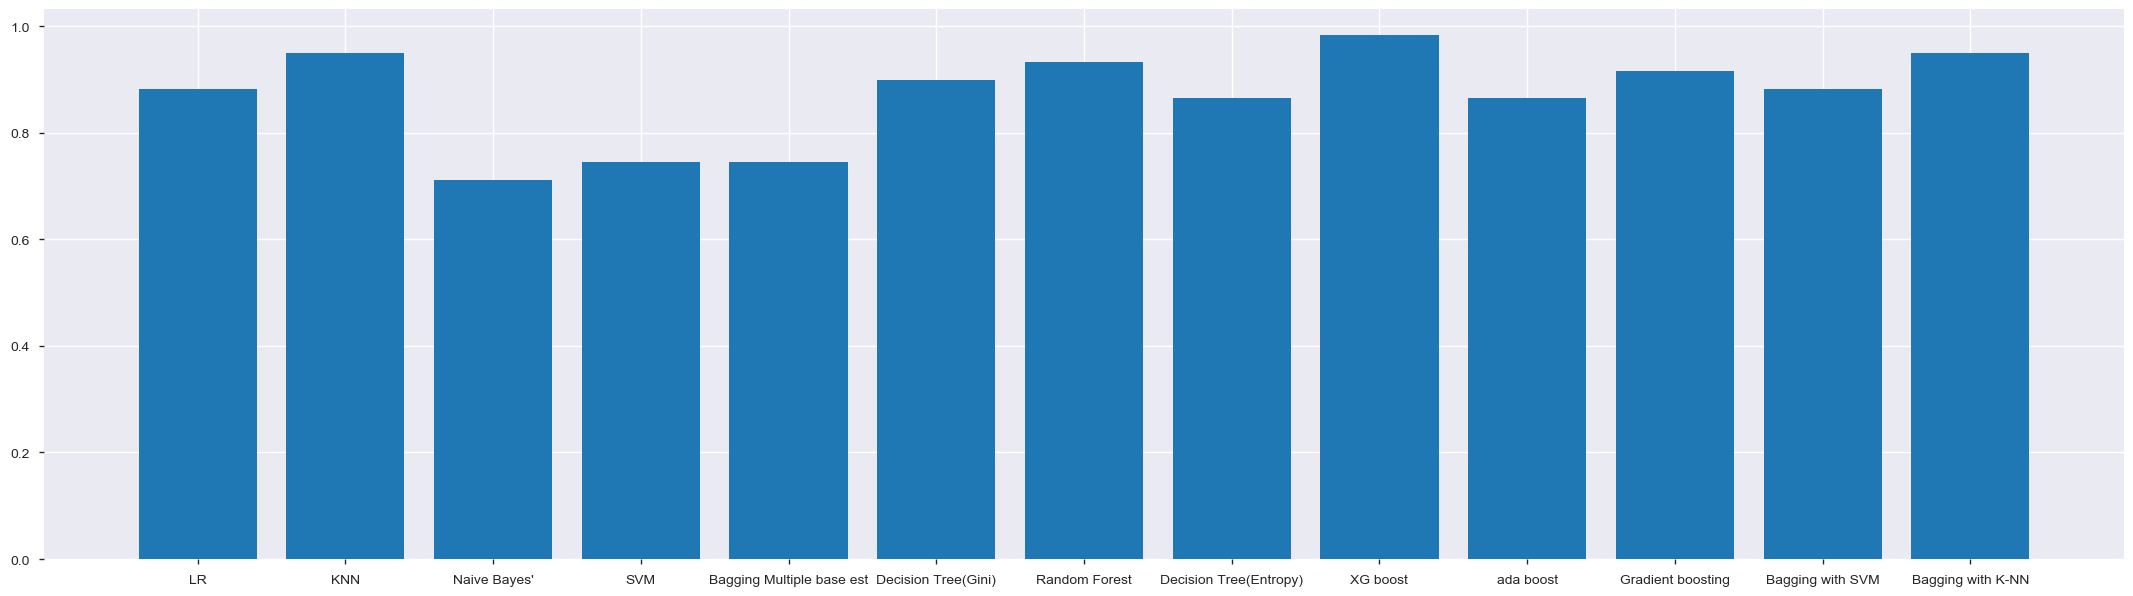

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,2.6,1])
langs = result['AcModel']
students = result['Accuracy']
ax.bar(langs,students)
plt.show()

# F1 Score plot

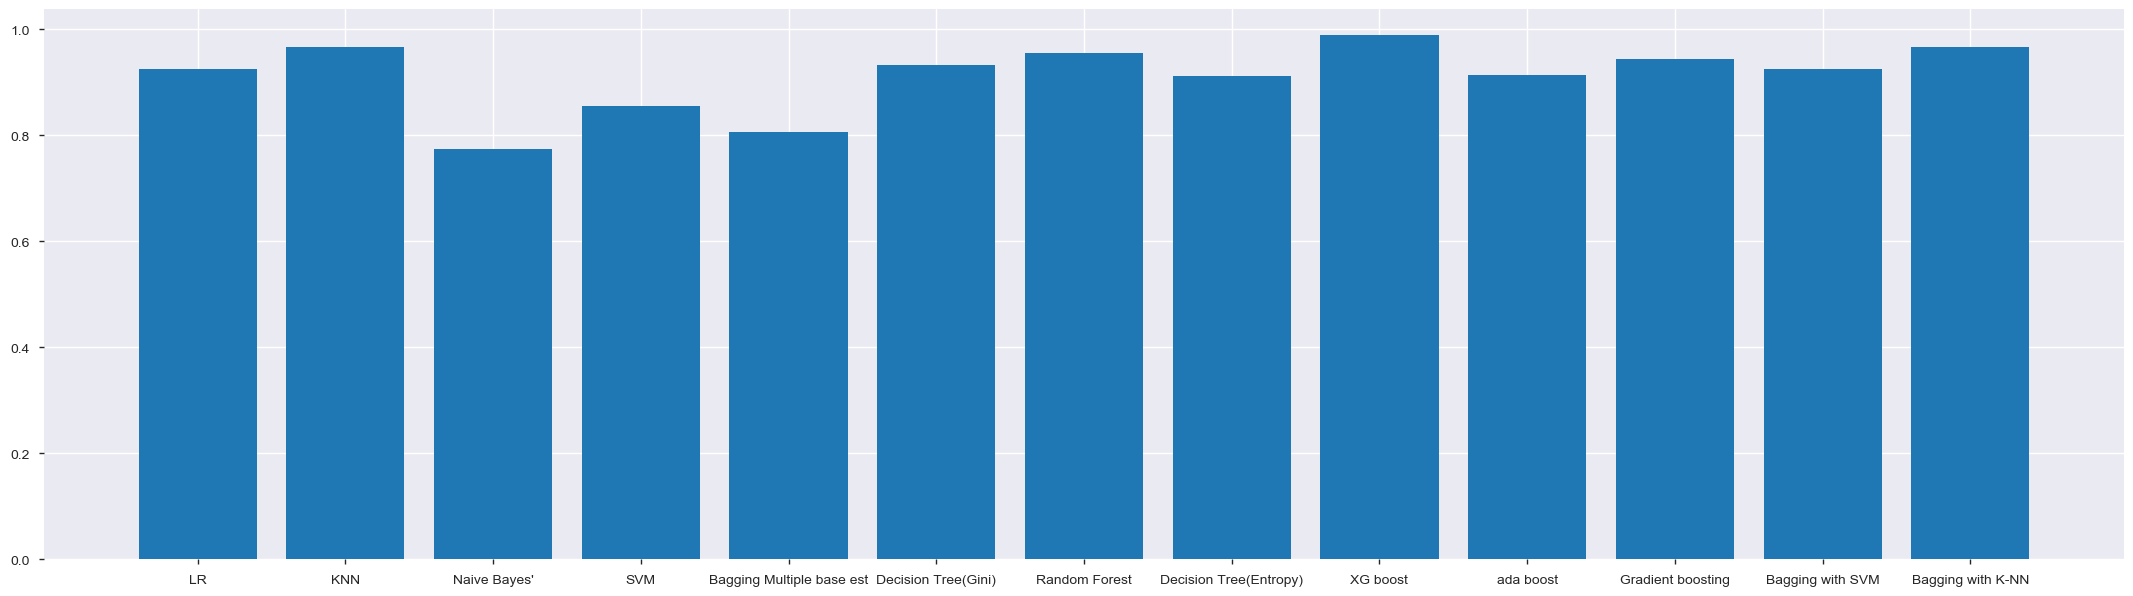

In [91]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,2.6,1])
langs = result['AcModel']
students = result['F1 Score']
ax.bar(langs,students)
plt.show()

# Recall score plot

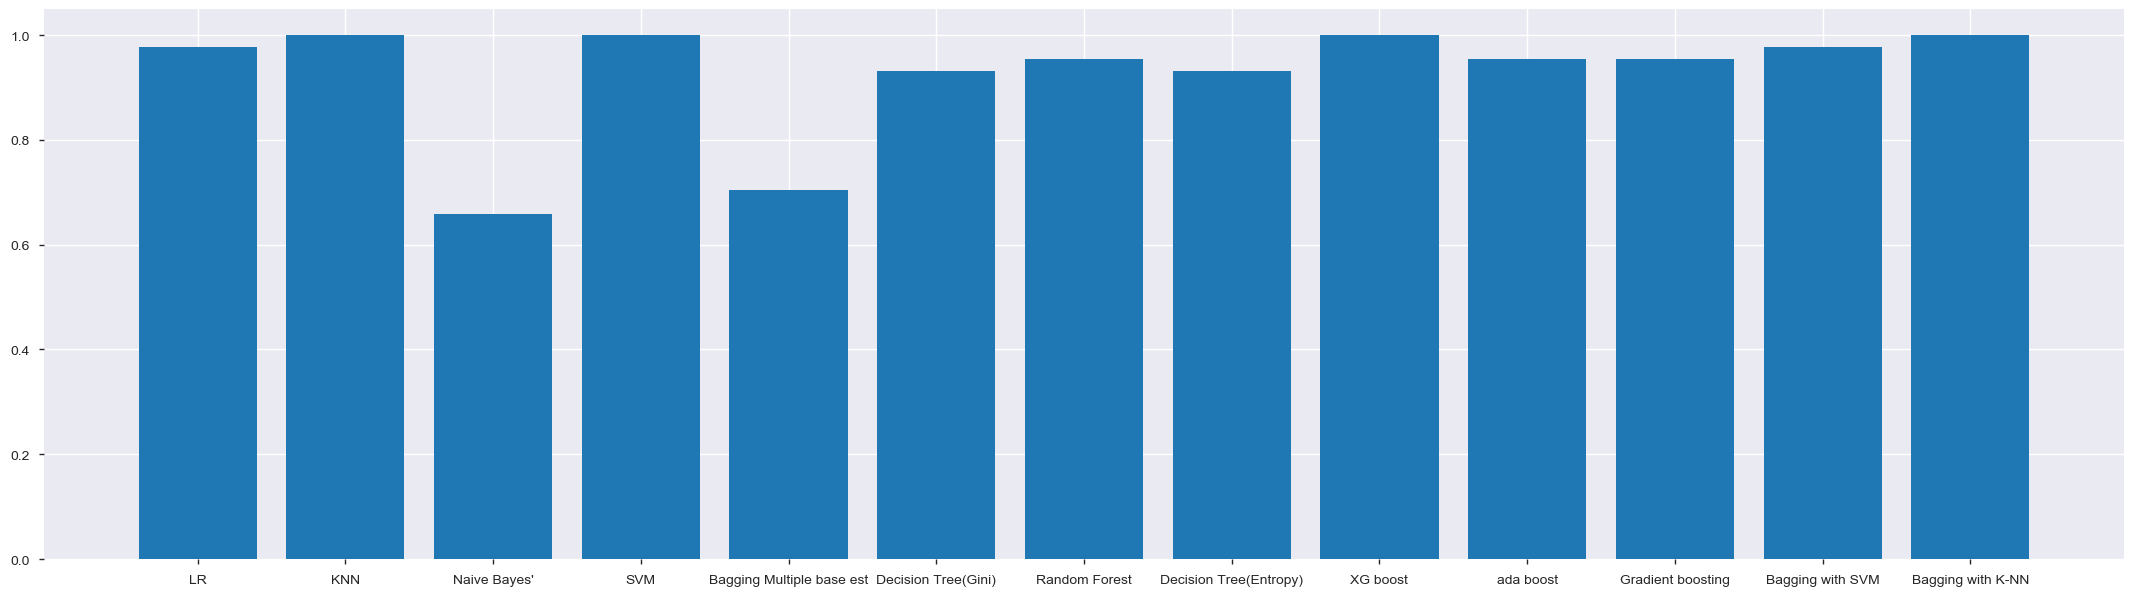

In [92]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([2,2,2.6,1])
langs = result['AcModel']
students = result['Recall']
ax.bar(langs,students)
plt.show()

# XG boost is the best fit model for this data set, when we compare all the scores